In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets




/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# metadata
print(individual_household_electric_power_consumption.metadata)



{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [ ]:
# variable information
print(individual_household_electric_power_consumption.variables)

                    name     role         type demographic description units  \
0                   Date  Feature         Date        None        None  None   
1                   Time  Feature  Categorical        None        None  None   
2    Global_active_power  Feature   Continuous        None        None  None   
3  Global_reactive_power  Feature   Continuous        None        None  None   
4                Voltage  Feature   Continuous        None        None  None   
5       Global_intensity  Feature   Continuous        None        None  None   
6         Sub_metering_1  Feature   Continuous        None        None  None   
7         Sub_metering_2  Feature   Continuous        None        None  None   
8         Sub_metering_3  Feature   Continuous        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7             no  
8             no  


In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(inplace=True)

<ipython-input-7-2520c5615a7a>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


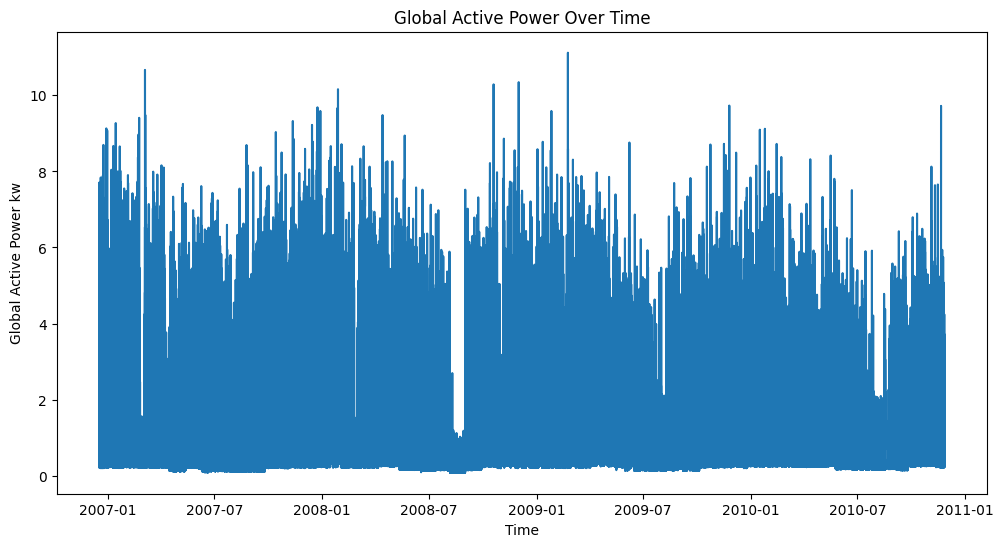

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power kw')
plt.show()

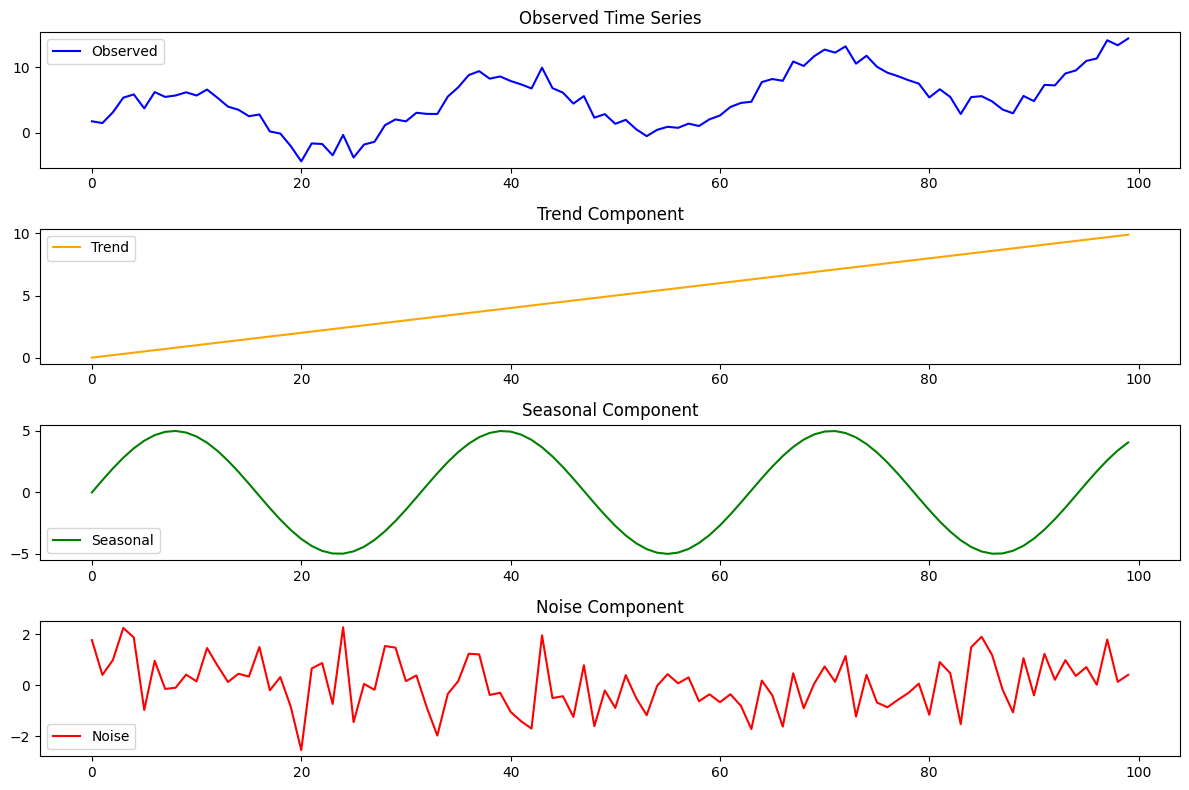

In [ ]:
time = np.arange(0, 100)
trend = time * 0.1
seasonal = 5 * np.sin(time * 0.2)
np.random.seed(0)
noise = np.random.normal(0, 1, size=time.shape)
ts_data = trend + seasonal + noise
time_series = pd.Series(ts_data, index=time)
df1 = pd.DataFrame({
    'Trend': trend,
    'Seasonal': seasonal,
    'Noise': noise,
    'Observed': time_series
})

# Plot the individual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df1['Observed'], label='Observed', color='blue')
plt.title('Observed Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df1['Trend'], label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df1['Seasonal'], label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df1['Noise'], label='Noise', color='red')
plt.title('Noise Component')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
result = seasonal_decompose(df['Global_active_power'], model='additive', period=24)

<ipython-input-11-385e7ec7acf8>:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


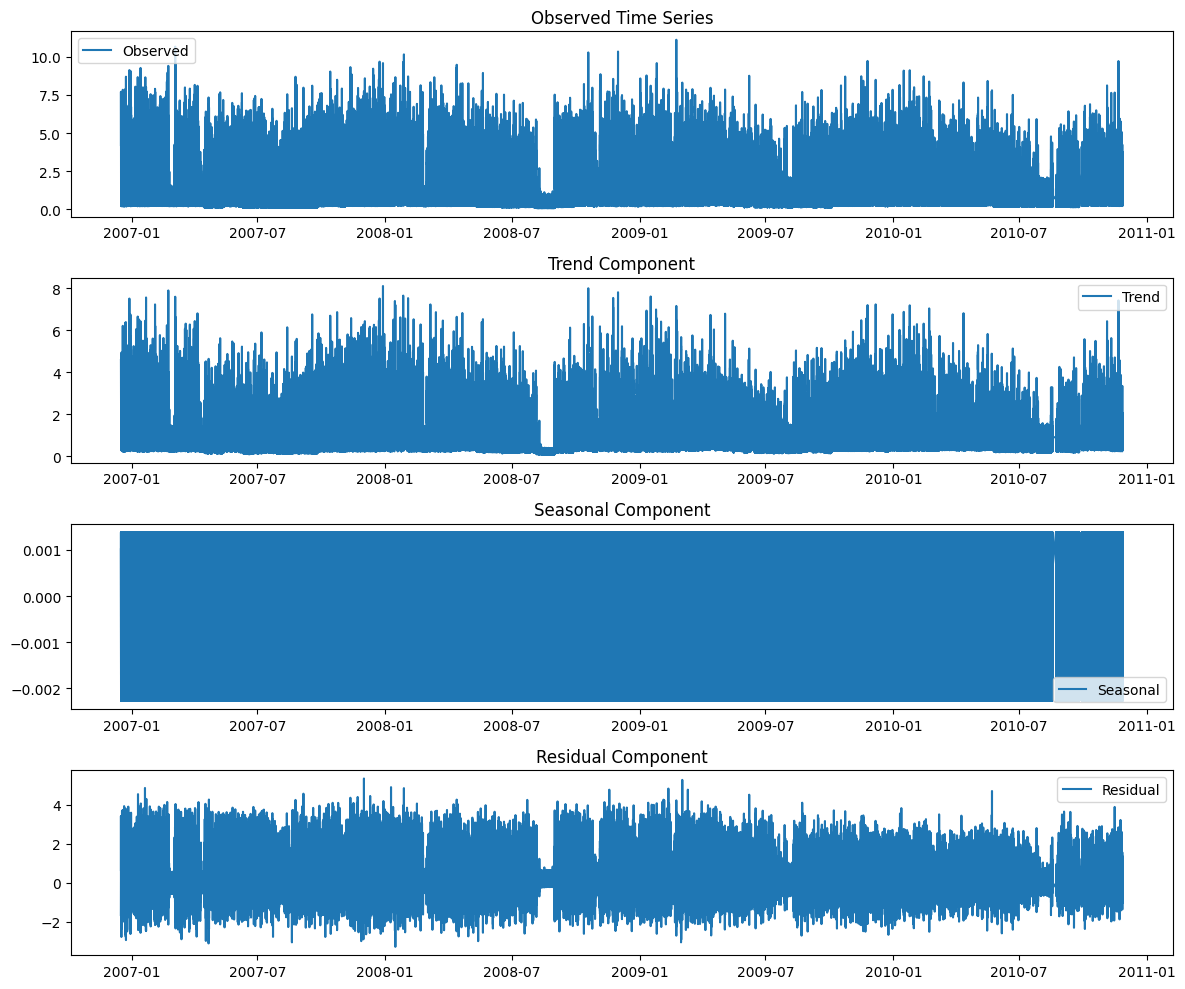

In [ ]:
# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.title('Observed Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Resample to daily frequency and take the mean
daily_data = df['Global_active_power'].resample('D').mean()

# Fill missing values (e.g., using forward fill)
daily_data.fillna(daily_data.mean(), inplace=True)

# Decompose the daily time series
result = seasonal_decompose(daily_data, model='additive', period=30)  # Daily data


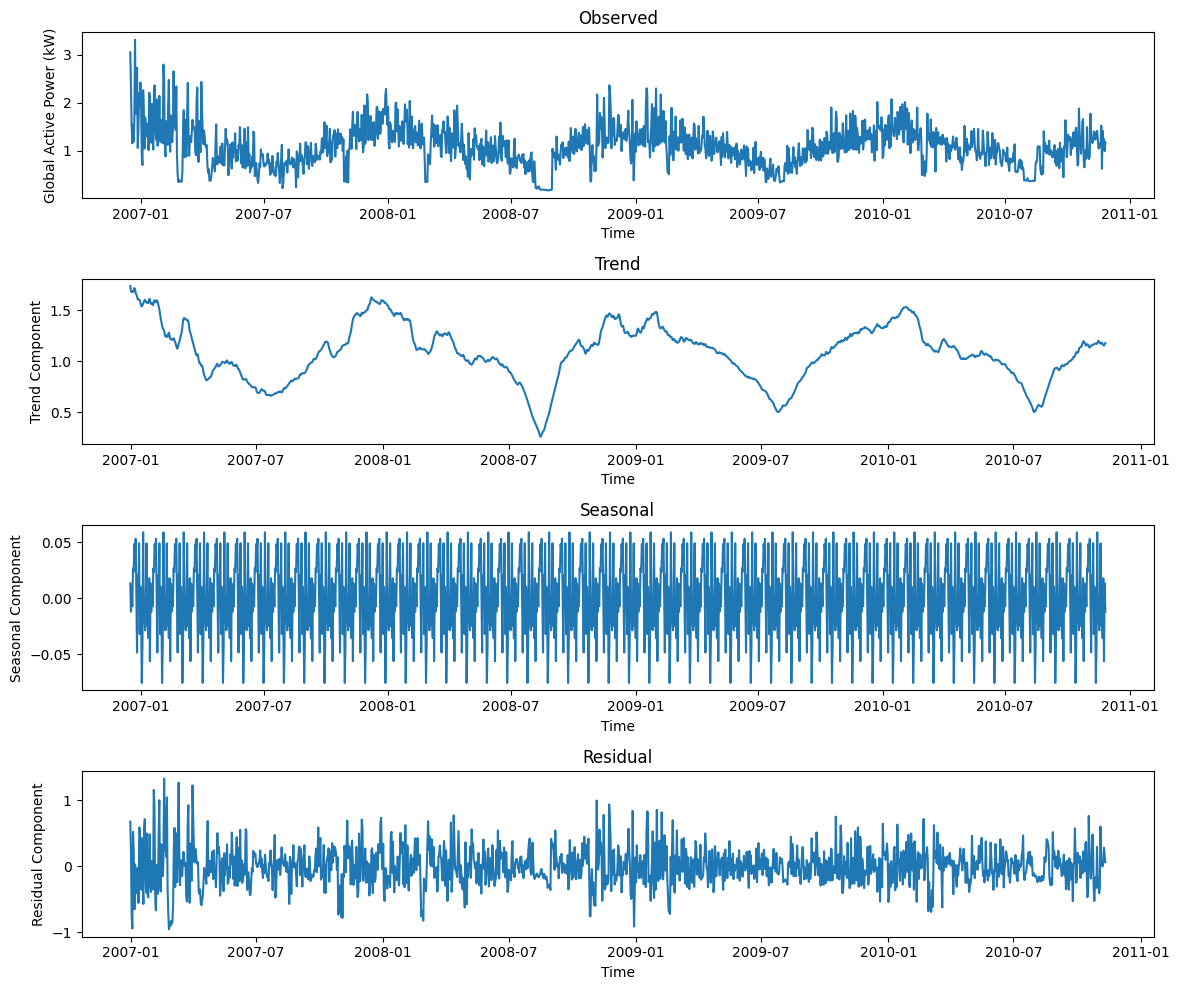

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
non_stationary = daily_data
# Stationary (differenced series to remove trend)
stationary = daily_data.diff().dropna()

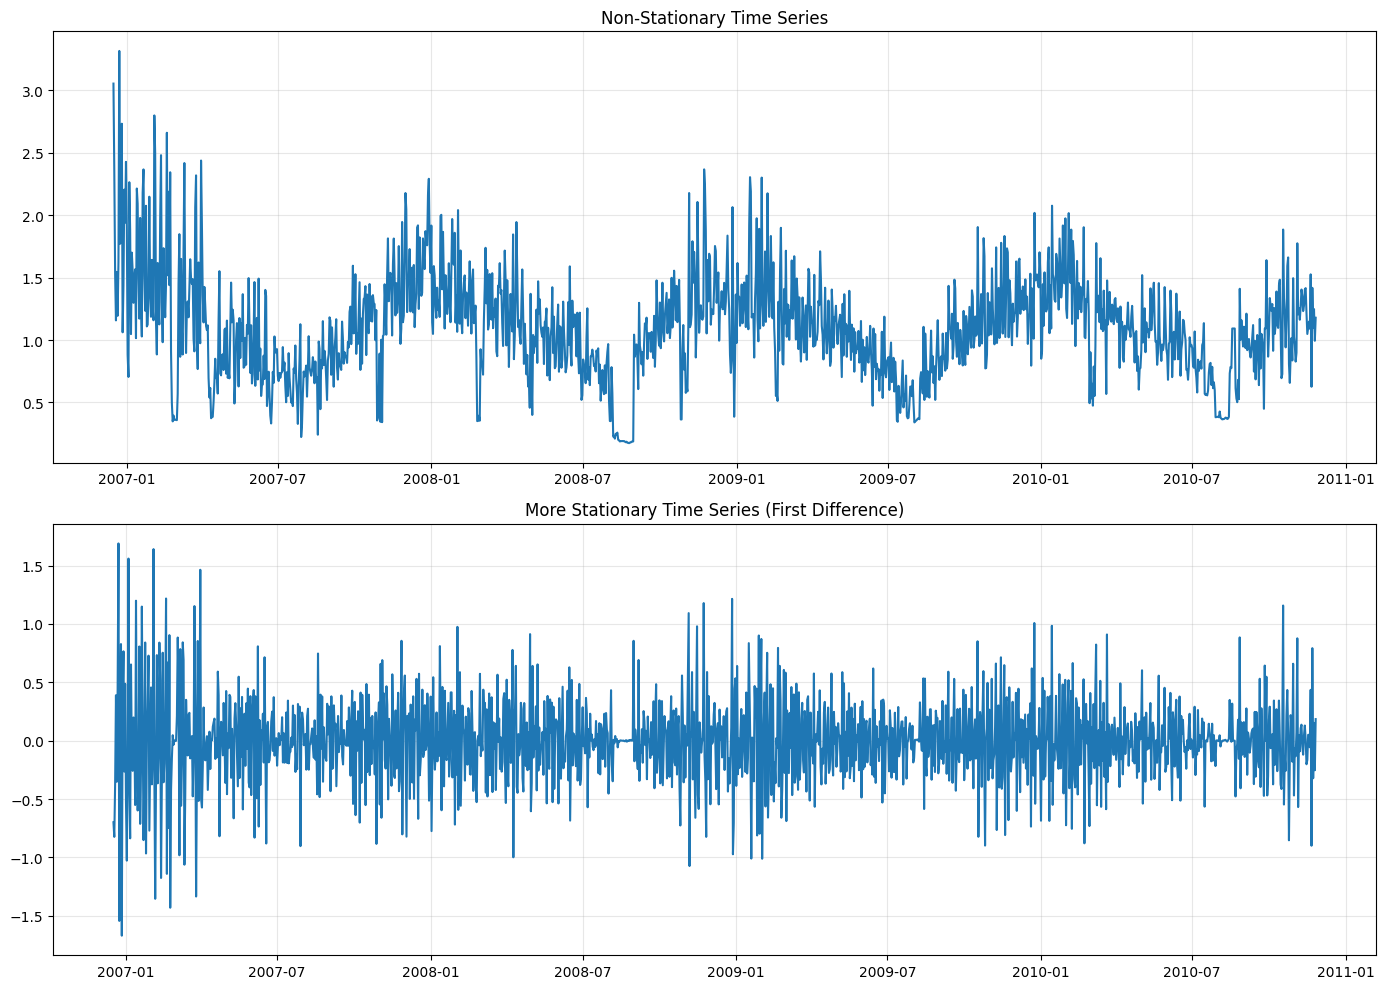

In [ ]:
# Visualize both series
plt.figure(figsize=(14, 10))

plt.subplot(211)
plt.plot(non_stationary)
plt.title('Non-Stationary Time Series')
plt.grid(True, alpha=0.3)

plt.subplot(212)
plt.plot(stationary)
plt.title('More Stationary Time Series (First Difference)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Augmented Dickey-Fuller Test for Stationarity
def perform_adf_test(series, title):
    print(f"\nADF Test for {title}:")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

# Perform ADF test on both series
perform_adf_test(non_stationary, "Non-Stationary Series")
perform_adf_test(stationary, "Stationary Series (First Difference""1. Introduction to Time Series.pptx")


ADF Test for Non-Stationary Series:
ADF Statistic: -3.6955
p-value: 0.0042
Critical Values:
	1%: -3.4350
	5%: -2.8636
	10%: -2.5679
Series is stationary (reject null hypothesis)

ADF Test for Stationary Series (First Difference1. Introduction to Time Series.pptx:
ADF Statistic: -11.0672
p-value: 0.0000
Critical Values:
	1%: -3.4350
	5%: -2.8636
	10%: -2.5679
Series is stationary (reject null hypothesis)


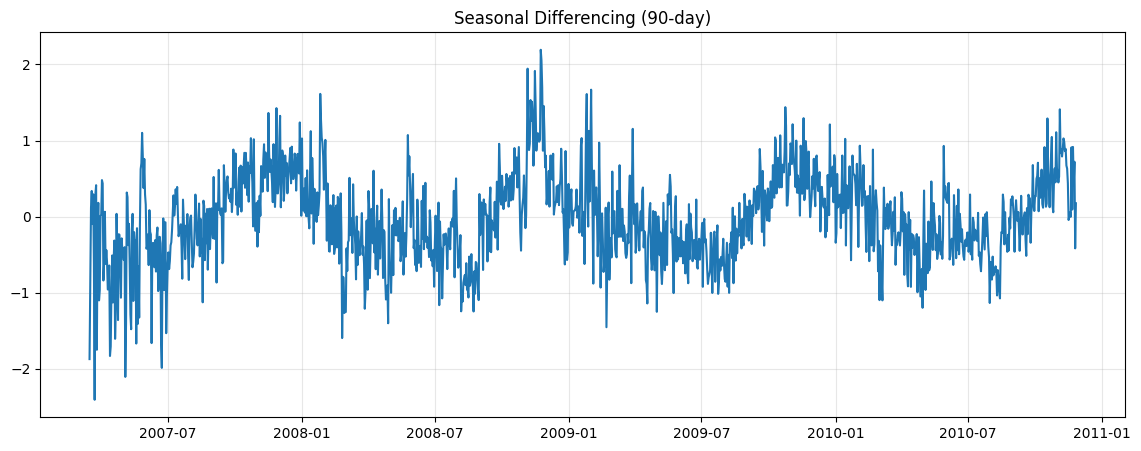

In [ ]:
seasonal_diff = daily_data.diff(90).dropna()
plt.figure(figsize=(14, 5))
plt.plot(seasonal_diff)
plt.title('Seasonal Differencing (90-day)')
plt.grid(True, alpha=0.3)
plt.show()

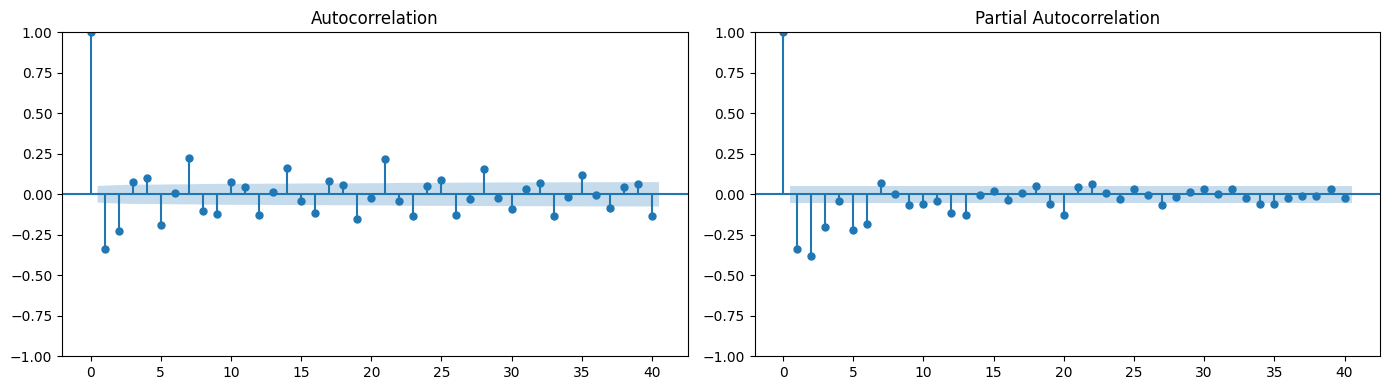

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(stationary, lags=40, ax=axes[0])
plot_pacf(stationary, lags=40, ax=axes[1])
plt.tight_layout()
plt.show()

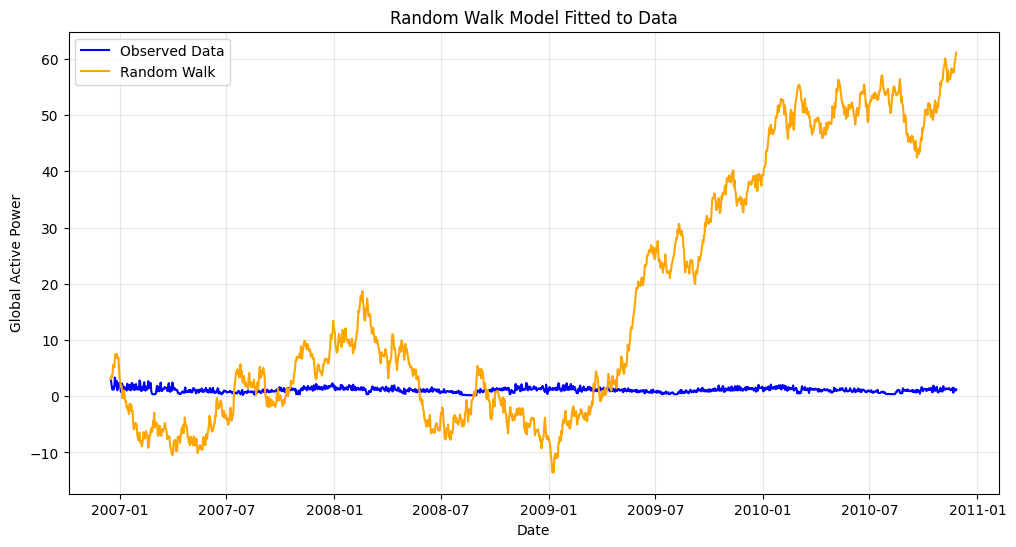

In [ ]:
np.random.seed(42)
n_steps = len(daily_data)
random_walk = np.zeros(n_steps)
random_walk[0] = daily_data.iloc[0]  # Start from first value of data
for i in range(1, n_steps):
    random_walk[i] = random_walk[i-1] + np.random.normal(0, 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Observed Data', color='blue')
plt.plot(daily_data.index, random_walk, label='Random Walk', color='orange')
plt.title('Random Walk Model Fitted to Data')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
daily_data = daily_data.reset_index()
daily_data['Time'] = np.arange(len(daily_data))
X = daily_data[['Time']]
y = daily_data['Global_active_power']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse:.4f}')
r_squared = model.score(X, y)
print(f'R-squared: {r_squared:.4f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Mean Squared Error: 0.1735
R-squared: 0.0118
Root Mean Squared Error (RMSE): 0.4165


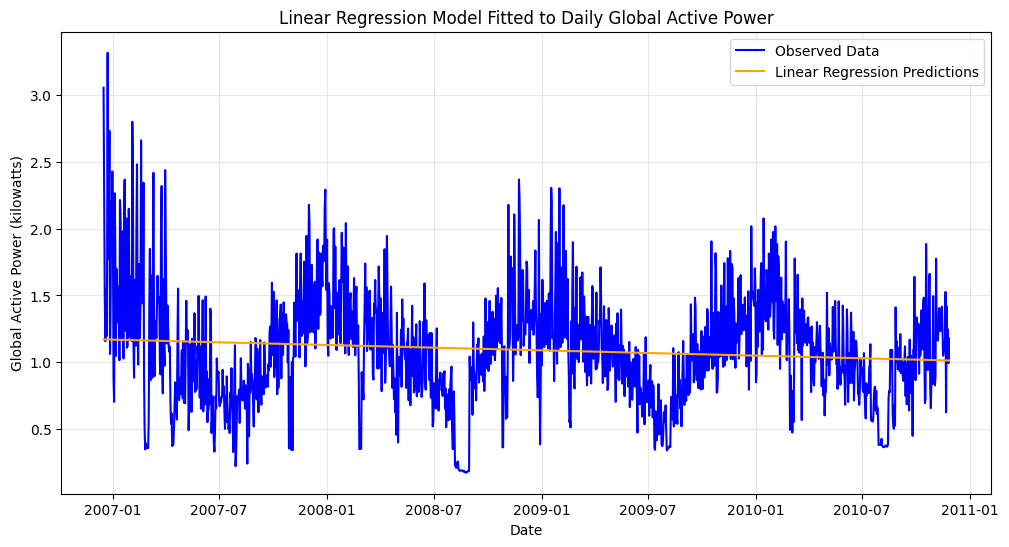

In [ ]:
# Plotting the observed and predicted values
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Datetime'], y, label='Observed Data', color='blue')
plt.plot(daily_data['Datetime'], predictions, label='Linear Regression Predictions', color='orange')
plt.title('Linear Regression Model Fitted to Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()